In [342]:
import pandas as pd
%config Completer.use_jedi = False



In [408]:
import pandas as pd
import csv
import numpy as np
df=pd.read_csv('./datas/고혈압2.csv')

df2=pd.read_csv('./datas/스트레스데이터.csv')

df.drop('시군구별(1)',axis=1,inplace=True)
df2.drop('시군구별(1)',axis=1,inplace=True)
go_list=[]
stress_list=[]
#print(df)
for i in df.index:
    go_list.append(df.loc[i].values.tolist())
    stress_list.append(df2.loc[i].values.tolist())
    
go_list=np.array(go_list)
stress_list=np.array(stress_list)
stress_list=stress_list.flatten()
go_list=go_list.flatten()


df_stress_go=pd.DataFrame({
    '고혈압':go_list,
    '스트레스':stress_list
})



cnt=0
sum=0
sum_stress_list=[]
#print(stress_list)
print(len(stress_list))
for i in stress_list:
    sum+=i
    cnt+=1
    if(cnt==9):
        sum_stress_list.append(sum/10)
        cnt=0
        sum=0




170


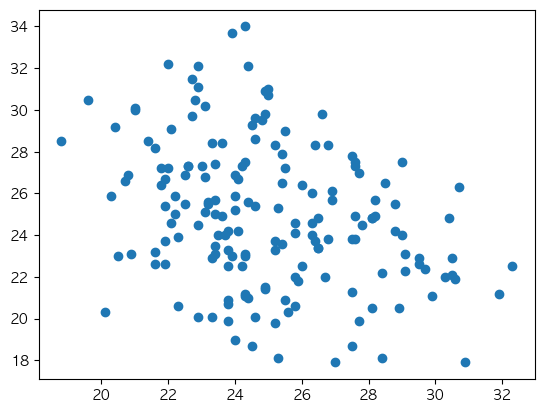

In [346]:
from matplotlib import pyplot as plt
#%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

#plt.scatter(df['스트레스'], df['범죄율']) 
#plt.show() #그래프 표시

plt.scatter(df_stress_go['스트레스'],df_stress_go['고혈압'])
plt.show()

In [378]:
correlation = df_stress_go.corr()
print(correlation)

           고혈압      스트레스
고혈압   1.000000 -0.324835
스트레스 -0.324835  1.000000


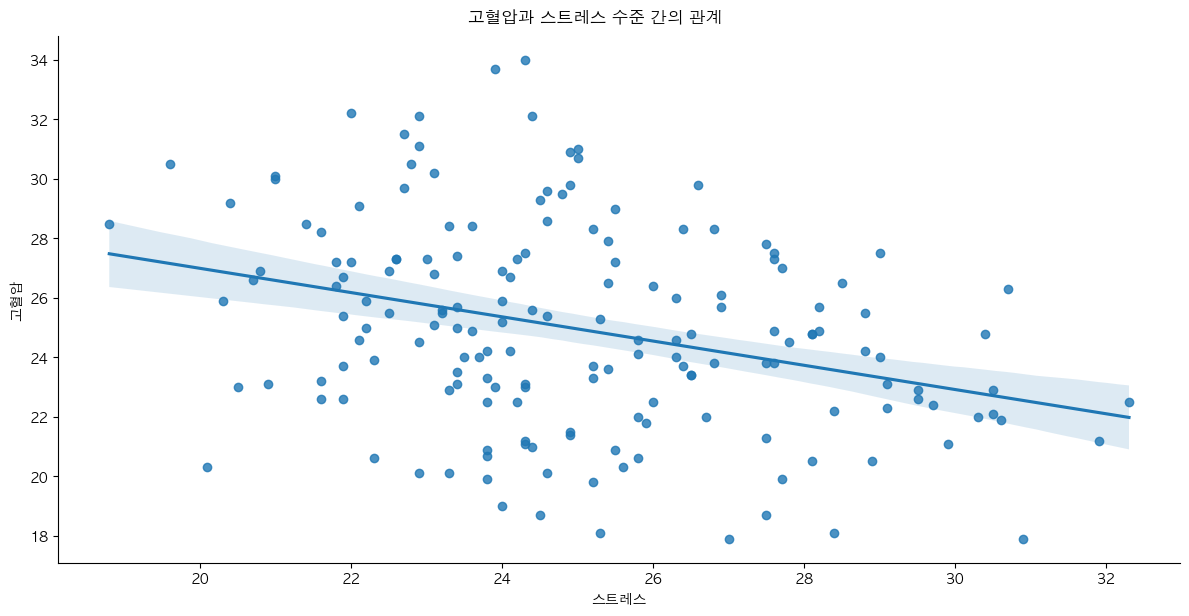

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
sns.lmplot(x='스트레스', y='고혈압', data=df_stress_go, height=6, aspect=2)

plt.suptitle('고혈압과 스트레스 수준 간의 관계', y=1.02)
plt.show()

[27.7 34.0 38.7 37.7 36.0 34.3 38.8 40.2 36.6 33.5]


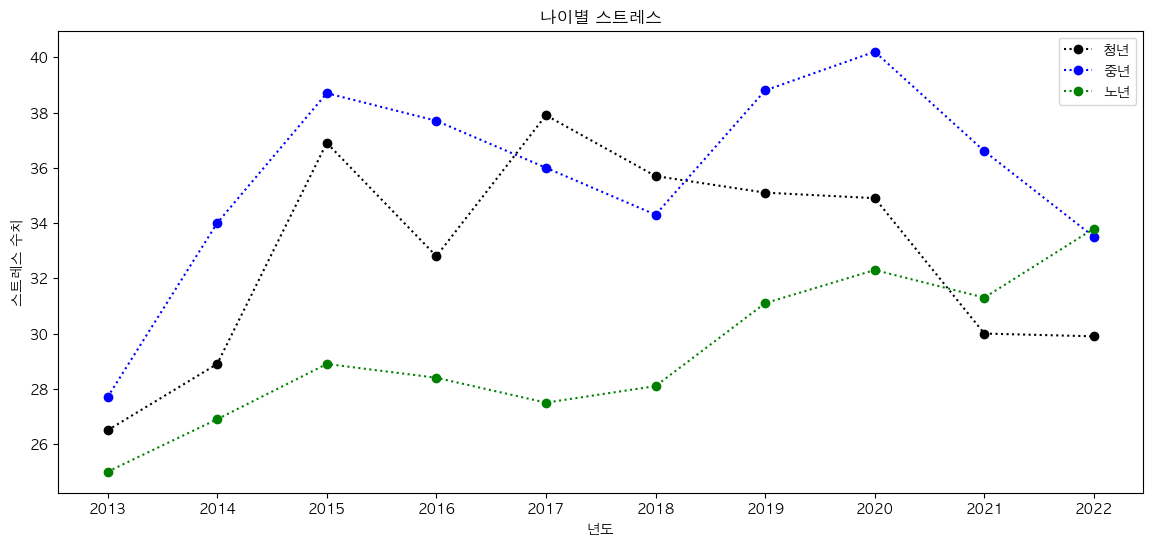

In [382]:
import pandas as pd
import csv
import numpy as np
stress_gender=pd.read_csv("./datas/스트레스남여.csv")

man_stress=stress_gender.loc[3].values
man_stress=man_stress.flatten()
woman_stress=stress_gender.loc[4].values
woman_stress=woman_stress.flatten()

youngMan_stress=stress_gender.loc[5].values
youngMan_stress=youngMan_stress.flatten()

middleMan_stress=stress_gender.loc[6].values
middleMan_stress=middleMan_stress.flatten()

oldMan_stress=stress_gender.loc[7].values
oldMan_stress=oldMan_stress.flatten()



oldMan_stress=oldMan_stress[11:]
woman_stress=woman_stress[11:]
man_stress=man_stress[11:]
youngMan_stress=youngMan_stress[11:]
middleMan_stress=middleMan_stress[11:]


print(middleMan_stress)


bar_width = 0.5
years= list(map(int,(range(2013,2023))))


plt.figure(figsize=(14, 6))
#plt.bar(years, man_stress, bar_width, label='남성', color='blue')
plt.plot(years, youngMan_stress, ':o', color='k', label='청년')
plt.plot(years, middleMan_stress, ':o', color='b', label='중년')
plt.plot(years, oldMan_stress, ':o', color='g', label='노년')
plt.xlabel('년도')
#plt.grid('True')
plt.ylabel('스트레스 수치')
plt.title('나이별 스트레스')
plt.xticks(years)
plt.legend()
plt.show()




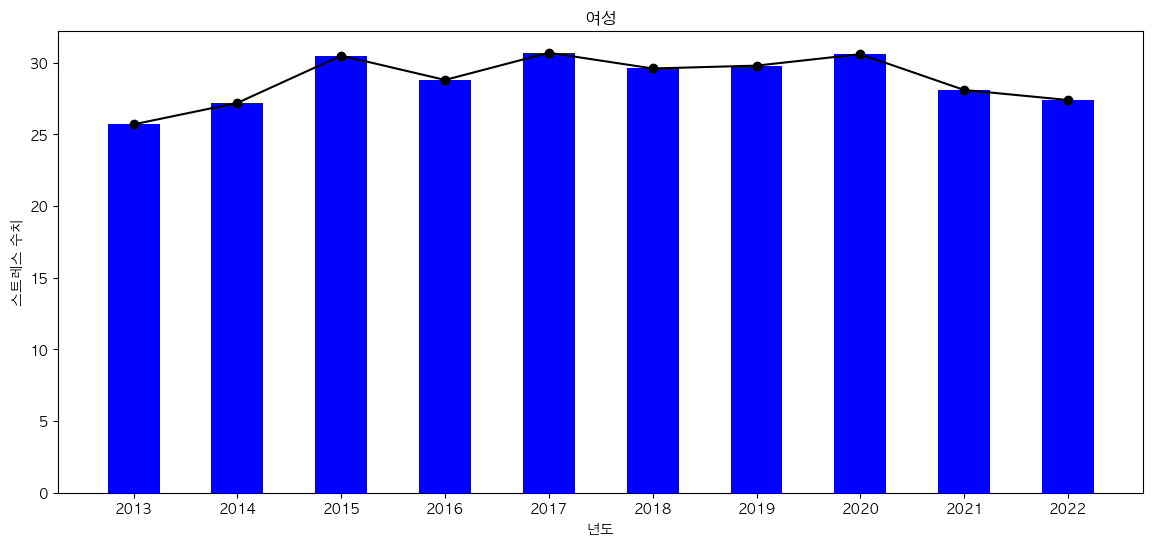

In [384]:
plt.figure(figsize=(14, 6))
plt.bar(years, woman_stress, bar_width, label='여성', color='blue')
plt.plot(years,woman_stress,'-ok')
plt.xlabel('년도')
plt.ylabel('스트레스 수치')
plt.title('여성')
#plt.grid('True')
plt.xticks(years)
plt.show()


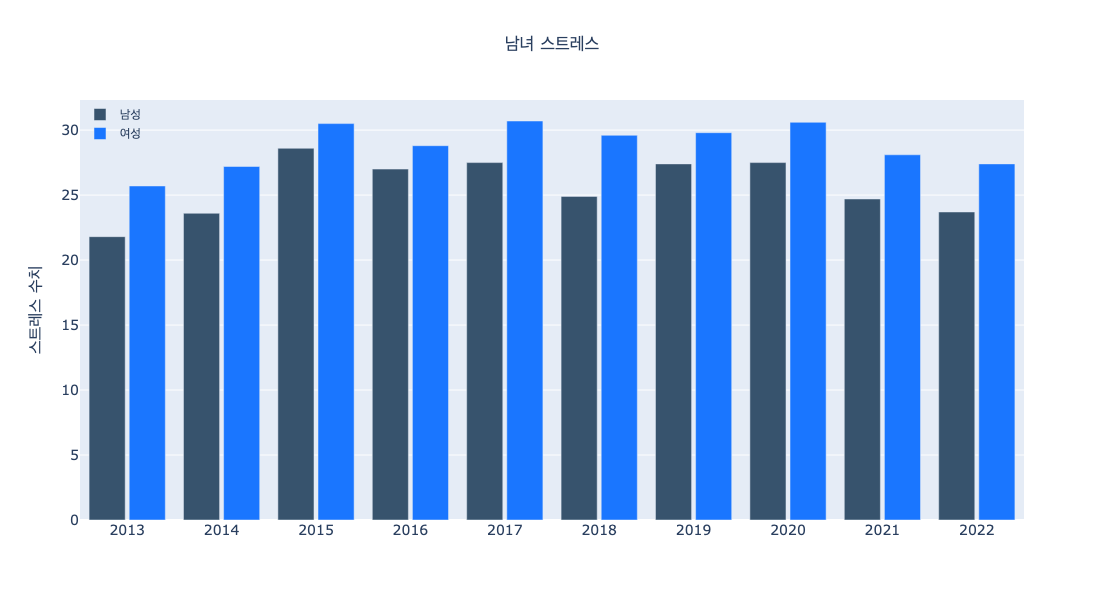

In [386]:
import plotly.graph_objects as go

years = list(range(2013, 2023))

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=man_stress,
                name='남성',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=woman_stress,
                name='여성',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='남녀 스트레스',
    title_x=0.5,  # 타이틀을 중앙으로 정렬
    xaxis=dict(
        tickfont_size=14,
        dtick=1  # x축에 모든 년도가 표시되도록 설정
    ),
    yaxis=dict(
        title='스트레스 수치',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1000,  # 그래프의 너비
    height=600   # 그래프의 높이
)

fig.show()


In [388]:
#!pip install googlemaps
import googlemaps
import yaml
my_key
with open('datas/googleMapApi.yaml') as f:
    file = yaml.full_load(f)
maps = googlemaps.Client(key=my_key)
lat_stress = []  #위도
lng_stress = []  #경도

places = ['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도',
          '강원특별자치도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']

i=0
for place in places:   
    i = i + 1
    try:
        geo_location = maps.geocode(place)[0].get('geometry')
        lat_stress.append(geo_location['location']['lat'])
        lng_stress.append(geo_location['location']['lng'])
        

    except:
        lat_stress.append('')
        lng_stress.append('')
        print("%d번 인덱스 위치를 찾는데 실패했습니다."%(i))


# 데이터프레임만들어 출력하기

df = pd.DataFrame({'위도':lat_stress, '경도':lng_stress}, index=places)
print(df)

                위도          경도
서울특별시    37.565213  126.977352
부산광역시    35.173112  129.071412
대구광역시    35.850103  128.520619
인천광역시    37.475158  126.631267
광주광역시    35.150082  126.855907
대전광역시    36.357758  127.386746
울산광역시    35.537680  129.328012
세종특별자치시  36.601226  127.298209
경기도      37.414285  127.468140
강원특별자치도  37.827200  128.316573
충청북도     36.802263  127.723768
충청남도     36.474210  126.781950
전라북도     35.749168  127.125859
전라남도     34.853834  126.868079
경상북도     36.397390  128.987674
경상남도     35.376346  128.147727
제주특별자치도  33.378561  126.566191


In [410]:
from folium.features import CustomIcon
import folium
import pandas as pd
from folium.plugins import HeatMap
center = [37.541, 126.986]


m = folium.Map(location=center, zoom_start=7)
#print(len(station_group.sum(axis=1).values))
#print(station_group.shape)
#print(len(address_station['위도']))
# 서울 부산 대구 인천 광주 
#10 ro

print(len(lat_stress))
print(len(sum_stress_list))
sum_group=pd.DataFrame({
    '위도':lat_stress,
    '경도':lng_stress,
    '스트레스지역':sum_stress_list[0:-1],
})

print(sum_group)


data_list = sum_group[['위도','경도','스트레스지역']].values.tolist()

c_dic = {'서울특별시':'darkblue','부산광역시':'green','대구광역시':'orange','인천광역시':'lightblue','광주광역시':'darkpurple','대전광역시':'black','울산광역시':'darkgreen','세종특별자치시':'pink','경기도':'beige','강원특별자치도':'blue',
        '충청북도':'beige','충청남도':'cadetblue','전라북도':'cadetblue','전라남도':'cadetblue','경상북도':'cadetblue','경상남도':'cadetblue','제주특별자치도':'blue'}
image_paths = {
    '서울특별시': './datas/서울시.png',
    
}
# for i in sum_group.index:
#     icon_path = image_paths.get(places[i], None)
#     if icon_path: 
#         icon = CustomIcon(icon_image=icon_path, icon_size=(30, 30))  # 이미지 크기 조절
#         folium.Marker(
#             location=list(sum_group.loc[i, ['위도', '경도']]),
#             popup=places[i],
#             icon=icon
#         ).add_to(m)
#     else:
#         folium.Marker(
#             location=list(sum_group.loc[i, ['위도', '경도']]),
#             popup=places[i],
#             icon=folium.Icon(color=c_dic[places[i]], icon='star')
#         ).add_to(m)

HeatMap(data_list, radius=50, opacity=0.6).add_to(m)


#m.save('./datas/스트레스지수2.html')

m

17
18
           위도          경도  스트레스지역
0   37.565213  126.977352   24.62
1   35.173112  129.071412   21.79
2   35.850103  128.520619   20.81
3   37.475158  126.631267   24.26
4   35.150082  126.855907   24.31
5   36.357758  127.386746   23.78
6   35.537680  129.328012   21.63
7   36.601226  127.298209   22.07
8   37.414285  127.468140   23.79
9   37.827200  128.316573   24.67
10  36.802263  127.723768   22.28
11  36.474210  126.781950   23.40
12  35.749168  127.125859   23.96
13  34.853834  126.868079   21.82
14  36.397390  128.987674   21.48
15  35.376346  128.147727   19.98
16  33.378561  126.566191   20.19
